In [1]:
# %pip install datasets
# %pip install Pillow
# %pip install numpy
# %pip install matplotlib
# %pip install import_ipynb
# %pip install tensorflow
# %pip install tensorflow.keras
# %pip install easyocr
# %pip install pandas

# # library from etl
# %pip install datasets
# %pip install numpy
# %pip install Pillow
# %pip install opencv-python
# %pip install json

In [2]:
import easyocr
import matplotlib.pyplot as plt
from datasets import load_dataset
import numpy as np
from PIL import Image
import cv2
import tensorflow as tf
# from tensorflow.keras import layers
import json
import pandas as pd

In [3]:
from kaggle_secrets import UserSecretsClient
import os

# Ambil GitHub token dari Kaggle Secrets
user_secrets = UserSecretsClient()
myGithub = user_secrets.get_secret("githubKey")

# Clone repo GitHub
!git clone https://{myGithub}@github.com/fitristachan/invoice-image-processing.git invoice_image_processing
!git -C invoice_image_processing pull

Cloning into 'invoice_image_processing'...
remote: Enumerating objects: 1573, done.
remote: Counting objects: 100% (83/83), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 1573 (delta 53), reused 43 (delta 27), pack-reused 1490 (from 2)
Receiving objects: 100% (1573/1573), 308.54 MiB | 45.74 MiB/s, done.
Resolving deltas: 100% (235/235), done.
Updating files: 100% (1296/1296), done.
Already up to date.


In [4]:
# from google.colab import userdata

# # Retrieve the GitHub token from userdata
# myGithub = userdata.get('githubKey')

# !git clone https://{myGithub}@github.com/fitristachan/invoice-image-processing.git /content/invoice_image_processing
# !git -C invoice_image_processing pull



In [5]:
# import sys
# import os

# sys.path.append('/content/invoice-image-processing')
# print(os.listdir('/content/invoice-image-processing'))

# !jupyter nbconvert --to script '/content/invoice-image-processing/data_etl_invoice.ipynb' --output data_etl

Image Classification

In [6]:
from invoice_image_processing.data_etl import DatasetReceipt

/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.5 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [7]:
# Inisialisasi dataset
dataset_local = DatasetReceipt(dataset_name="naver-clova-ix/cord-v2", split="train")
dataset_inter = DatasetReceipt(dataset_name="katanaml-org/invoices-donut-data-v1", split="train")

README.md:   0%|          | 0.00/27.0 [00:00<?, ?B/s]

dataset_infos.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

(…)-00000-of-00004-b4aaeceff1d90ecb.parquet:   0%|          | 0.00/490M [00:00<?, ?B/s]

(…)-00001-of-00004-7dbbe248962764c5.parquet:   0%|          | 0.00/441M [00:00<?, ?B/s]

(…)-00002-of-00004-688fe1305a55e5cc.parquet:   0%|          | 0.00/444M [00:00<?, ?B/s]

(…)-00003-of-00004-2d0cd200555ed7fd.parquet:   0%|          | 0.00/456M [00:00<?, ?B/s]

(…)-00000-of-00001-cc3c5779fe22e8ca.parquet:   0%|          | 0.00/242M [00:00<?, ?B/s]

(…)-00000-of-00001-9c204eb3f4e11791.parquet:   0%|          | 0.00/234M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/800 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/100 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/100 [00:00<?, ? examples/s]

README.md:   0%|          | 0.00/1.04k [00:00<?, ?B/s]

(…)-00000-of-00001-a5c51039eab2980a.parquet:   0%|          | 0.00/167M [00:00<?, ?B/s]

(…)-00000-of-00001-b8a5c4a6237baf25.parquet:   0%|          | 0.00/19.9M [00:00<?, ?B/s]

(…)-00000-of-00001-56af6bd5ff7eb34d.parquet:   0%|          | 0.00/10.4M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/425 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/50 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/26 [00:00<?, ? examples/s]

In [8]:
from keras.applications import ResNet50V2

# keras.applications.ResNet50V2(
#     include_top=True,
#     weights="imagenet",
#     input_tensor=None,
#     input_shape=None,
#     pooling=None,
#     classes=1000,
#     classifier_activation="softmax",
#     name="resnet50v2",
# )

pre_trained_model = ResNet50V2(input_shape = (600, 600, 3),
                                include_top = False,
                                pooling='max'
                                )

pre_trained_model.summary()

94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "resnet50v2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 600, 600, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 606, 606, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 300, 300, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 302, 302, 64)   │              0 │ conv1_conv[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 150, 150, 64)   │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_bn    │ (None, 150, 150, 64)   │            256 │ pool1_pool[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_relu  │ (None, 150, 150, 64)   │              0 │ conv2_block1_preact_b… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 150, 150, 64)   │          4,096 │ conv2_block1_preact_r… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 150, 150, 64)   │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 150, 150, 64)   │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_pad        │ (None, 152, 152, 64)   │              0 │ conv2_block1_1_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 150, 150, 64)   │         36,864 │ conv2_block1_2_pad[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 150, 150, 64)   │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 150, 150, 64)   │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 150, 150, 256)  │         16,640 │ conv2_block1_preact_r… │
│ (Conv2D)             

 Total params: 23,564,800 (89.89 MB)

 Trainable params: 23,519,360 (89.72 MB)

 Non-trainable params: 45,440 (177.50 KB)

In [9]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd

# Load Dataset
train_dataset = DatasetReceipt(dataset_name="naver-clova-ix/cord-v2", split="train")
val_dataset = DatasetReceipt(dataset_name="naver-clova-ix/cord-v2", split="validation")

def find_price_column(df):
    # Prioritas 1: Kolom dengan nama exact 'price'
    if 'price' in df.columns:
        return 'price'
    
    # Prioritas 2: Cari kolom mengandung 'price' atau 'unitprice'
    price_columns = [
        col for col in df.columns 
        if any(kwd in col.lower() for kwd in ['price', 'unitprice'])
    ]
    
    return price_columns[0] if price_columns else None

def find_item_name_column(df):
    # Prioritas 1: Kolom dengan nama exact 'item', 'name', 'description'
    for col in df.columns:
        if col.lower() in ['nm','item', 'name']:
            return col
    
    # Prioritas 2: Cari kolom yang mengandung kata kunci
    item_columns = [
        col for col in df.columns 
        if any(kwd in col.lower() for kwd in ['item', 'name', 'desc', 'menu'])
    ]
    
    return item_columns[0] if item_columns else None

def find_quantity_column(df):
    # Prioritas 1: Kolom dengan nama exact 'quantity', 'qty'
    for col in df.columns:
        if col.lower() in ['cnt', 'qty']:
            return col
    
    # Prioritas 2: Cari kolom yang mengandung kata kunci
    qty_columns = [
        col for col in df.columns 
        if any(kwd in col.lower() for kwd in ['quantity', 'qty', 'amount'])
    ]
    
    return qty_columns[0] if qty_columns else None

# Function to generate batches with item names and quantities
def dataset_generator(dataset, batch_size=16, max_items=10, max_name_length=20, vocab_size=128):
    while True:
        # Initialize batch containers
        batch_images = []
        batch_bboxes = []
        batch_classes = []
        batch_names = []  # For item names
        batch_quantities = []  # For quantities
        batch_prices = []
        batch_totals = []

        for _ in range(batch_size):
            sample = dataset[np.random.randint(len(dataset))]
            
            # 1. Process Image
            img = sample["image"]
            if img.ndim == 4 and img.shape[0] == 1:
                img = img[0]  # Remove batch dimension if present
            batch_images.append(img)

            # 2. Bounding Box (mock data - replace with actual coordinates from your dataset)
            bbox = [0.1, 0.1, 0.5, 0.5]  # Replace with actual bbox if available
            batch_bboxes.append(bbox)

            # 3. Class Label (one-hot encoded)
            class_label = to_categorical(0, num_classes=5) 
            batch_classes.append(class_label)

            # Initialize padded arrays for variable-length data
            padded_names = np.zeros((max_items, max_name_length), dtype=np.int32)  # For text tokens
            padded_quantities = np.zeros(max_items, dtype=np.float32)
            padded_prices = np.zeros(max_items, dtype=np.float32)
            
            if "menu_df" in sample and not sample["menu_df"].empty:
                menu_df = sample["menu_df"]
                
                # Find relevant columns with flexible matching
                price_col = find_price_column(menu_df)
                name_col = find_item_name_column(menu_df)
                qty_col = find_quantity_column(menu_df)
                
                # Process item names (simplified tokenization)
                if name_col is not None:
                    names = menu_df[name_col].astype(str).str.lower().values
                    for i, name in enumerate(names[:max_items]):
                        # Simple tokenization - map characters to integers (0-127)
                        chars = [ord(c) % vocab_size for c in name[:max_name_length]]
                        padded_names[i, :len(chars)] = chars
                
                # Process quantities
                if qty_col is not None:
                    try:
                        quantities = pd.to_numeric(menu_df[qty_col], errors='coerce')
                        quantities = quantities.fillna(1).values  # Default to 1 if missing
                        quantities = np.clip(quantities, 1, None)  # Ensure at least 1
                        n_items = min(len(quantities), max_items)
                        padded_quantities[:n_items] = quantities[:n_items]
                    except Exception as e:
                        print(f"Quantity processing error: {e}")
                        padded_quantities[:] = 1  # Default to 1 if error
                
                # Process prices
                if price_col is not None:
                    try:
                        prices = pd.to_numeric(menu_df[price_col], errors='coerce')
                        prices = prices.fillna(0).values
                        prices = np.clip(prices, 0, None)
                        n_items = min(len(prices), max_items)
                        padded_prices[:n_items] = prices[:n_items]
                    except Exception as e:
                        print(f"Price processing error: {e}")
            
            batch_names.append(padded_names)
            batch_quantities.append(padded_quantities)
            batch_prices.append(padded_prices)

            # 5. Total Regression
            total = max(0, float(sample.get("total_price", 0)))
            batch_totals.append([total])

        # Convert to numpy arrays and yield
        yield (
            np.array(batch_images, dtype=np.float32),
            {
                "bounding_box": np.array(batch_bboxes, dtype=np.float32),
                "class_label": np.array(batch_classes, dtype=np.float32),
                "item_names": np.array(batch_names, dtype=np.int32).reshape(batch_size, 10 * 20),
                "quantities": np.array(batch_quantities, dtype=np.float32),
                "price_regression": np.array(batch_prices, dtype=np.float32),
                "total_regression": np.array(batch_totals, dtype=np.float32)
            }
        )

In [10]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Lambda, LSTM, Dense, TimeDistributed, RepeatVector
from tensorflow.keras import backend as K
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dropout, Input
import tensorflow as tf

# Training hyperparameters
INITIAL_LR = 0.001
SECOND_LR = 0.0001
MOMENTUM = 0.9
GRADIENT_CLIP_NORM = 10.0
STD_DEV = 0.01
EPOCHS = 25
STEPS_PER_EPOCH = 1000
NMS_IOU_THRESHOLD = 0.8

# 1. Define Input Layer
inputs = Input(shape=(600, 600, 3))  # Match your image size

# 2. Load Pretrained ResNet50V2 (without top)
base_model = ResNet50V2(
    input_shape=(600, 600, 3),
    include_top=False,
    pooling='max'  # GlobalMaxPooling2D
)
base_model.trainable = False  # Freeze weights

# 3. Connect Base Model to Inputs
x = base_model(inputs)

# 4. Add Custom Layers with Proper Initialization
kernel_initializer = tf.keras.initializers.RandomNormal(stddev=STD_DEV)
x = Dense(512, activation='relu', kernel_initializer=kernel_initializer)(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu', 
          kernel_regularizer=regularizers.l2(0.01),
          kernel_initializer=kernel_initializer)(x)

# 5. Define Output Layers
# Bounding box regression
bbox_output = Dense(4, name="bounding_box", kernel_initializer=kernel_initializer)(x)

# Classification output
class_output = Dense(5, activation='softmax', name="class_label", kernel_initializer=kernel_initializer)(x)

# Price regression (for up to 10 items)
price_output = Dense(10, activation='relu', name='price_regression', kernel_initializer=kernel_initializer)(x)
quantity_output = Dense(10, activation='relu', name='quantities', kernel_initializer=kernel_initializer)(x)

# Total amount regression
total_output = Dense(1, name="total_regression", kernel_initializer=kernel_initializer)(x)

# Mulai dari fitur CNN
sequence_input = Dense(256, activation='relu')(x)         # (None, 256)
sequence_input = RepeatVector(10)(sequence_input)         # (None, 10, 256)
sequence_input = TimeDistributed(RepeatVector(20))(sequence_input)  # (None, 10, 20, 256)

# Reshape ke LSTM-friendly: (batch * 10, 20, 256)
reshaped = Lambda(lambda t: tf.reshape(t, (-1, 20, 256)))(sequence_input)

# LSTM: (batch * 10, 20, 128)
lstm_output = LSTM(128, return_sequences=True)(reshaped)

NUM_CHAR_CLASSES = 122  # Ubah sesuai dengan jumlah karakter unikmu

# Dense ke NUM_CHAR_CLASSES dengan softmax
dense_logits = TimeDistributed(Dense(NUM_CHAR_CLASSES, activation='softmax'))(lstm_output)

# Reshape ke (batch, 200, NUM_CHAR_CLASSES)
name_output = Lambda(lambda t: tf.reshape(t, (-1, 10 * 20, NUM_CHAR_CLASSES)), name='item_names')(dense_logits)

# Create model
model = Model(
    inputs=inputs,
    outputs=[
        bbox_output,
        class_output,
        name_output,  
        quantity_output,
        price_output,
        total_output
    ]
)

# Learning rate schedule function
def lr_schedule(epoch):
    threshold_epoch = 23  # 23k steps / 1k steps per epoch
    if epoch < threshold_epoch:
        return INITIAL_LR
    return SECOND_LR

# 7. Configure Optimizer with Gradient Clipping
optimizer = SGD(
    learning_rate=INITIAL_LR,  # Initial rate, will be adjusted by callback
    momentum=MOMENTUM,
    clipnorm=GRADIENT_CLIP_NORM
)


In [11]:
# 8. Compile Model with Adjusted Loss Weights
model.compile(
    optimizer=optimizer,
    loss={
        "bounding_box": "mse",
        "class_label": "categorical_crossentropy",
        "item_names": "sparse_categorical_crossentropy",
        "quantities": "mse",
        "price_regression": "mse",
        "total_regression": "mse",
    },
    metrics={
        'bounding_box': 'mae',
        'class_label': 'accuracy',
        'item_names': 'accuracy',
        'quantities': 'mae',
        'total_regression': 'mae',
    },
    loss_weights={
        "bounding_box": 1.0,
        "class_label": 1.0,
        "price_regression": 1.0,
        "quantities": 0.8,  # Slightly reduced
        "total_regression": 1.2,  # Slightly increased
        "item_names": 1.5  # Highest priority
    }
)

In [12]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 600, 600, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ resnet50v2 (Functional)   │ (None, 2048)           │     23,564,800 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 512)            │      1,049,088 │ resnet50v2[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 512)            │              0 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 512)            │        262,656 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 256)            │        131,328 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ repeat_vector             │ (None, 10, 256)        │              0 │ dense_2[0][0]          │
│ (RepeatVector)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ time_distributed          │ (None, 10, 20, 256)    │              0 │ repeat_vector[0][0]    │
│ (TimeDistributed)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda (Lambda)           │ (None, 20, 256)        │              0 │ time_distributed[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ (None, 20, 128)        │        197,120 │ lambda[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ time_distributed_1        │ (None, 20, 122)        │         15,738 │ lstm[0][0]             │
│ (TimeDistributed)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bounding_box (Dense)      │ (None, 4)              │          2,052 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ class_label (Dense)       │ (None, 5)              │          2,565 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ item_names (Lambda)       │ (None, 200, 122)       │              0 │ time_distributed_1[0]… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ quantities (Dense)        │ (None, 10)             │          5,130 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ price_regression (Dense)  │ (None, 10)             │          5,130 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ total_regression (Dense)  │ (None, 1)              │            513 │ dense_1[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 25,236,120 (96.27 MB)

 Trainable params: 1,671,320 (6.38 MB)

 Non-trainable params: 23,564,800 (89.89 MB)

In [24]:
from tensorflow.keras.callbacks import (ModelCheckpoint, LearningRateScheduler, 
                                      TensorBoard, CSVLogger, Callback)
import tensorflow as tf

# 1. Enhanced Model Checkpoint
checkpoint_path = "/content/drive/MyDrive/dataset/model/model_checkpoint_resnet50v2.keras"
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    save_best_only=True,  # Now saving only best model
    monitor='val_loss',  # Monitoring validation loss
    mode='min',
    save_weights_only=False,
    save_freq='epoch',
    verbose=1
)

# 2. Learning Rate Scheduler (for the 23k/20k steps schedule)
def lr_schedule(epoch):
    threshold_epoch = 23  # 23k steps / 1k steps per epoch
    if epoch < threshold_epoch:
        return 0.001
    return 0.0001

lr_callback = LearningRateScheduler(lr_schedule, verbose=1)

# 3. Enhanced Early Stopping with Multiple Conditions
class EnhancedTrainingCallback(Callback):
    def __init__(self, patience=5):
        super(EnhancedTrainingCallback, self).__init__()
        self.patience = patience
        self.wait = 0
        self.stopped_epoch = 0
        self.best_loss = float('inf')
        
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        
        # Condition 1: Accuracy threshold
        current_acc = logs.get('item_names_accuracy', 0)
        current_val_acc = logs.get('val_item_names_accuracy', 0)
        if current_acc > 0.95 and current_val_acc > 0.95:
            print("\nAccuracy reached 95%! Stopping training.")
            self.model.stop_training = True
            self.stopped_epoch = epoch
            return
        
        # Condition 2: Loss plateau detection
        current_loss = logs.get('loss', float('inf'))
        if current_loss < self.best_loss:
            self.best_loss = current_loss
            self.wait = 0
        else:
            self.wait += 1
            if self.wait >= self.patience:
                print(f"\nTraining stopped early after {self.patience} epochs without improvement.")
                self.model.stop_training = True
                self.stopped_epoch = epoch

stop_callback = EnhancedTrainingCallback(patience=5)

# 4. CSV Logging (corrected version)
csv_logger = CSVLogger(
    'training_log.csv',
    separator=',',
    append=False  # Change to True if you want to continue previous logs
)

# 5. TensorBoard Integration
tensorboard_callback = TensorBoard(
    log_dir='./logs',
    histogram_freq=1,
    write_graph=True,
    write_images=False,
    update_freq='epoch',
    profile_batch=0  # Disable profiling for cleaner logs
)

# Combine all callbacks
final_callbacks = [
    checkpoint_callback,
    lr_callback,
    stop_callback,
    csv_logger,
    tensorboard_callback
]

In [14]:
# Data Augmentation
train_generator = dataset_generator(train_dataset, vocab_size=128)
val_generator = dataset_generator(val_dataset, vocab_size=128)

In [25]:
batch = next(iter(train_generator))
x_batch, y_batch = batch

for key in y_batch:
    print(f"{key}: {y_batch[key].shape}")

bounding_box: (16, 4)
class_label: (16, 5)
item_names: (16, 200)
quantities: (16, 10)
price_regression: (16, 10)
total_regression: (16, 1)


In [26]:
model.output_names

ListWrapper(['bounding_box', 'class_label', 'item_names', 'quantities', 'price_regression', 'total_regression'])

In [ ]:
x, y = next(train_generator)
for k in y:
    print(k, y[k].shape, y[k].dtype, np.any(np.isnan(y[k])))


In [ ]:
loss = model.train_on_batch(x, y)
print(loss)

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=STEPS_PER_EPOCH,
    epochs=EPOCHS,
    validation_data=val_generator,
    validation_steps=500,  # Adjust based on validation set size
    callbacks=final_callbacks,
    verbose=1
)


Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/25
 349/1000 ━━━━━━━━━━━━━━━━━━━━ 11:28 1s/step - bounding_box_loss: nan - bounding_box_mae: nan - class_label_accuracy: 1.0000 - class_label_loss: nan - item_names_accuracy: 0.8562 - item_names_loss: nan - loss: nan - price_regression_loss: nan - quantities_loss: nan - quantities_mae: nan - total_regression_loss: nan - total_regression_mae: nan

In [20]:
with open("training_log.csv") as f:
    for i, line in enumerate(f):
        if i == 0: 
            print("Header:", len(line.split(',')), "columns")
        if i == 26:  # Baris 27 (indeks 0-based)
            print("Line 27:", len(line.split(',')), "columns")
            print("Content:", line)
            break

Header: 26 columns


In [21]:
from io import StringIO
import pandas as pd
import matplotlib.pyplot as plt

def clean_log_file(path):
    with open(path) as f:
        # Ambil header (baris pertama)
        header = f.readline().strip()
        # Filter baris yang memiliki 12 koma (13 kolom)
        lines = [line.strip() for line in f if line.count(',') == 12]
        
    # Gabungkan header dengan data yang sudah difilter
    cleaned_data = [header] + lines
    return pd.read_csv(StringIO('\n'.join(cleaned_data)))

# Baca dan bersihkan data
try:
    log_data = clean_log_file("training_log.csv")
except Exception as e:
    print(f"Error: {e}")
    # Fallback: baca dengan engine python
    log_data = pd.read_csv("training_log.csv", engine='python', on_bad_lines='warn')

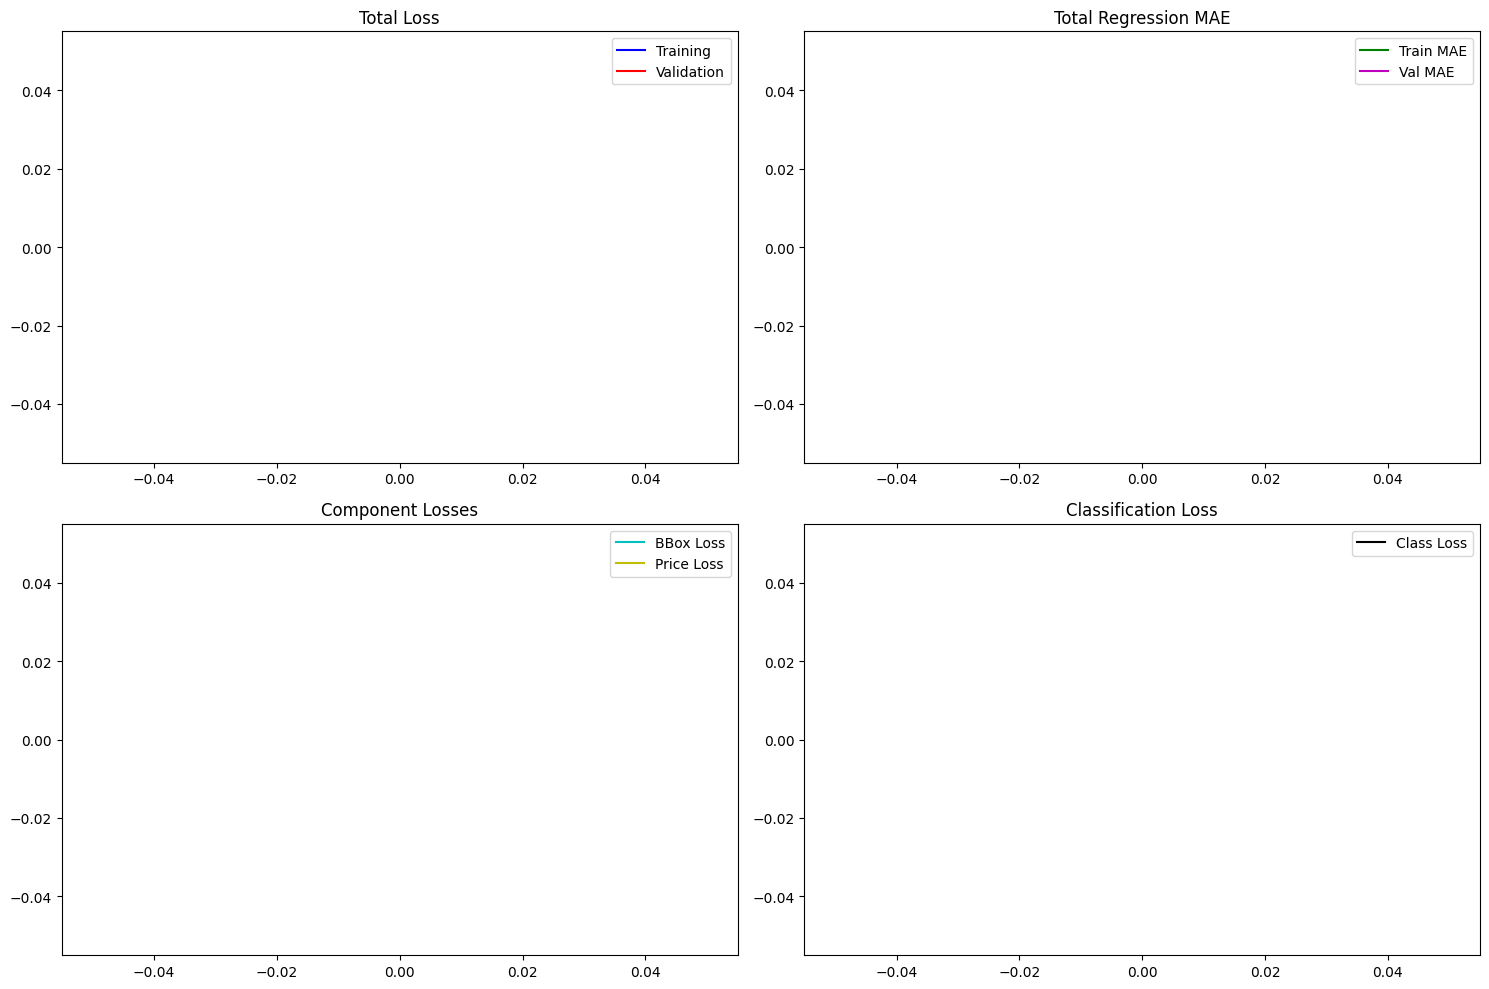

In [22]:
# Load training log
log_data = pd.read_csv("training_log.csv")

plt.figure(figsize=(15, 10))

# Plot Total Loss
plt.subplot(2, 2, 1)
plt.plot(log_data['epoch'], log_data['loss'], 'b-', label='Training')
plt.plot(log_data['epoch'], log_data['val_loss'], 'r-', label='Validation')
plt.title('Total Loss')
plt.legend()

# Plot Regression Performance
plt.subplot(2, 2, 2)
plt.plot(log_data['epoch'], log_data['total_regression_mae'], 'g-', label='Train MAE')
plt.plot(log_data['epoch'], log_data['val_total_regression_mae'], 'm-', label='Val MAE')
plt.title('Total Regression MAE')
plt.legend()

# Plot Component Losses
plt.subplot(2, 2, 3)
plt.plot(log_data['epoch'], log_data['bounding_box_loss'], 'c-', label='BBox Loss')
plt.plot(log_data['epoch'], log_data['price_regression_loss'], 'y-', label='Price Loss')
plt.title('Component Losses')
plt.legend()

# Plot Class Loss
plt.subplot(2, 2, 4)
plt.plot(log_data['epoch'], log_data['class_label_loss'], 'k-', label='Class Loss')
plt.title('Classification Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# # Save Model
# model.save("faster_rcnn_resnet50v2.h5")
# print("Model saved successfully!")

**Text Extraction**

> using easyocr

> support bahasa indonesia and english





In [ ]:
reader = easyocr.Reader(['en', 'id'])

def is_receipt(text):
    text_lower = text.lower()

    if 'total' or 'amount' or 'jumlah' and 'price' or 'harga' in text_lower:
        print("This is a valid receipt.")
    else:
        print("This is not a valid receipt.")


def process_image(image):
    # Convert PIL Image to numpy array
    image_np = np.array(image)
    if image_np.dtype != np.uint8:
        image_np = (image_np * 255).astype(np.uint8)  # Normalisasi jika float64

    # Extract text using EasyOCR
    results = reader.readtext(image_np)

    # Combine all detected text into a single string
    extracted_text = ' '.join([result[1] for result in results])

    # Check if the extracted text is a receipt
    is_receipt(extracted_text)

    print("Extracted Text:")
    print(extracted_text)

Fine Tuning

In [ ]:
# data_tuning_local = load_dataset("naver-clova-ix/cord-v2", split="train")
# data_tuning_inter = load_dataset("katanaml-org/invoices-donut-data-v1", split="train")
# data_tuning_inter[5]


In [ ]:
# import os
# import json

# def convert_dataset_local(dataset, output_file):
#     annotations = []

#     # Pastikan folder untuk menyimpan gambar ada
#     os.makedirs("dataset_images", exist_ok=True)

#     for i, data in enumerate(dataset):
#         image = data["image"]  # Objek gambar dari PIL
#         ground_truth = json.loads(data["ground_truth"])  # Parsing JSON string

#         # Simpan gambar ke folder agar bisa digunakan oleh EasyOCR
#         image_path = f"dataset_images/image_{i}.jpg"
#         image.save(image_path)

#         # Ambil teks dan bounding box dari ground truth
#         text = ground_truth["gt_parse"]  # Semua teks dan informasi struk
#         words = []
#         for line in ground_truth["valid_line"]:  # Ambil setiap baris
#             for word in line["words"]:  # Ambil setiap kata dalam baris
#                 words.append({
#                     "text": word["text"],
#                     "quad": word["quad"],
#                     "row_id": word["row_id"],
#                     "category": line["category"],
#                     "group_id": line["group_id"]
#                 })

#         # Simpan dalam format yang sesuai untuk EasyOCR
#         annotations.append({
#             "image": image_path,
#             "text": text,
#             "words": words
#         })

#     # Simpan hasil dalam file JSON
#     with open(output_file, "w", encoding="utf-8") as f:
#         json.dump(annotations, f, indent=4, ensure_ascii=False)


# def convert_dataset_inter(dataset, output_file):
#     """
#     Mengonversi dataset faktur/invoice ke format JSON untuk EasyOCR.
#     """
#     annotations = []

#     for i, data in enumerate(dataset):
#         image = data["image"]  # PIL Image
#         ground_truth = json.loads(data["ground_truth"])["gt_parse"]  # Parse JSON

#         # Simpan gambar
#         image_path = f"dataset_images/invoice_{i}.jpg"
#         os.makedirs("dataset_images", exist_ok=True)
#         image.save(image_path)

#         words = []
#         items = ground_truth.get("items", [])  # Pastikan mengambil 'items' dengan default []
#         if items:
#             for item in items:
#                 words.append({
#                     "text": item.get("item_desc", "UNKNOWN_ITEM"),
#                     "quad": None,
#                     "row_id": None,
#                     "group_id": None
#                 })

#         annotations.append({
#             "image": image_path,
#             "text": ground_truth,  # Simpan seluruh teks yang diparsing
#             "bbox": words
#         })

#         # Pastikan folder Google Drive tujuan benar
#         drive_folder = "G:/My Drive/dataset"
#         output_file = os.path.join(drive_folder, "dataset_annotations.json")

#         # Simpan sebagai JSON
#         with open(output_file, "w", encoding="utf-8") as f:
#             json.dump(annotations, f, indent=4, ensure_ascii=False)

#         print(f"Dataset invoice berhasil disimpan ke {output_file}")


In [ ]:
# # Konversi dataset 1 dan dataset 2
# convert_dataset_local(data_tuning_local, "data_tuning_local.json")
# convert_dataset_inter(data_tuning_inter, "data_tuning_inter.json")

In [ ]:
# python train.py --batch_size 16 --num_epochs 10 --lr 0.001 --train_data data_tuning_local.json data_tuning_inter.json


POST-PROCESSING

Pre-Processing Hasil Text Extraction

Training BERT/NER